## Lab 1 Exploring datasets

In this lab, you will be working with exploring and preparing a dataset for data mining tasks. Save your implementations with the name 'lab1_yourname.ipynb' and submit by the due date.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",100)
import warnings
warnings.simplefilter('ignore')

## Data overview

This dataset contains information on reviews of arabica and robusta coffee beans from the Coffee Quality Institute's trained reviewers. The features in the datatset are as follows:

## Quality Measures
- Aroma
- Flavor
- Aftertaste
- Acidity
- Body
- Balance
- Uniformity
- Cup Cleanliness
- Sweetness
- Moisture
- Defects

## Bean Metadata
- Processing Method
- Color
- Species (arabica / robusta)

## Farm Metadata
- Owner
- Country of Origin
- Farm Name
- Lot Number
- Mill
- Company
- Altitude
- Region


### Load data

In [2]:
filepath = './coffee_stats.csv'
data = pd.read_csv(filepath, index_col=False)
data.columns = data.columns.str.lower()
data = data.drop(columns=data.columns[0])

In [3]:
# a view of the dataset
data.head()

,species,owner,country.of.origin,farm.name,lot.number,mill,ico.number,company,altitude,region,producer,number.of.bags,bag.weight,in.country.partner,harvest.year,grading.date,owner.1,variety,processing.method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,total.cup.points,moisture,category.one.defects,quakers,color,category.two.defects,expiration,certification.body,certification.address,certification.contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
data.describe()

,number.of.bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,total.cup.points,moisture,category.one.defects,quakers,category.two.defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [5]:
#description of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   species                1339 non-null   object 
 1   owner                  1332 non-null   object 
 2   country.of.origin      1338 non-null   object 
 3   farm.name              980 non-null    object 
 4   lot.number             276 non-null    object 
 5   mill                   1021 non-null   object 
 6   ico.number             1182 non-null   object 
 7   company                1130 non-null   object 
 8   altitude               1113 non-null   object 
 9   region                 1280 non-null   object 
 10  producer               1107 non-null   object 
 11  number.of.bags         1339 non-null   int64  
 12  bag.weight             1339 non-null   object 
 13  in.country.partner     1339 non-null   object 
 14  harvest.year           1292 non-null   object 
 15  grad


<div class='alert alert-block alert-warning' style='font-size:150%'>
    
### Data Cleaning

</div>

**Data Cleaning** involves handling missing data, removing duplicates, and removing inconsistent values.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1

### 1a: Real data usually contains missing values. First, identify whether the dataset contains an missing values.
### 1b: Fill the missing values in the categorical columns with 'Unknown'
### 1c: Second, apply any of the techniques in the link to address the missing values in the numerical colums in the   dataset(https://pandas.pydata.org/docs/user_guide/missing_data.html).
    
### 1d: Find out if there are any duplicates in the dataset and remove them

</div>

In [6]:
# please implement task 1a here
# get names of columns with missing values
data_summary = data.isnull().sum()
data_summary

species                     0
owner                       7
country.of.origin           1
farm.name                 359
lot.number               1063
mill                      318
ico.number                157
company                   209
altitude                  226
region                     59
producer                  232
number.of.bags              0
bag.weight                  0
in.country.partner          0
harvest.year               47
grading.date                0
owner.1                     7
variety                   226
processing.method         170
aroma                       0
flavor                      0
aftertaste                  0
acidity                     0
body                        0
balance                     0
uniformity                  0
clean.cup                   0
sweetness                   0
cupper.points               0
total.cup.points            0
moisture                    0
category.one.defects        0
quakers                     1
color     

In [7]:
# please implement task 1b here
categorical_columns = data.select_dtypes(include = ['object']).columns
data[categorical_columns] = data[categorical_columns].fillna("Unknown") 
data[categorical_columns].isnull().sum()

species                  0
owner                    0
country.of.origin        0
farm.name                0
lot.number               0
mill                     0
ico.number               0
company                  0
altitude                 0
region                   0
producer                 0
bag.weight               0
in.country.partner       0
harvest.year             0
grading.date             0
owner.1                  0
variety                  0
processing.method        0
color                    0
expiration               0
certification.body       0
certification.address    0
certification.contact    0
unit_of_measurement      0
dtype: int64

In [8]:
# please implement task 1c here
from sklearn.impute import KNNImputer
numeric_cols = data.select_dtypes(include=['int', 'float']).columns.tolist()


# Initialize the KNN imputer with k=3 (default value)
knn_imputer = KNNImputer(n_neighbors=3)

# Apply the imputer to our data
data_imputed = data.copy()
data_imputed[numeric_cols] = knn_imputer.fit_transform(data[numeric_cols])

# Check if there are still any missing values in the numerical columns
data_imputed[numeric_cols].isnull().sum()

number.of.bags          0
aroma                   0
flavor                  0
aftertaste              0
acidity                 0
body                    0
balance                 0
uniformity              0
clean.cup               0
sweetness               0
cupper.points           0
total.cup.points        0
moisture                0
category.one.defects    0
quakers                 0
category.two.defects    0
altitude_low_meters     0
altitude_high_meters    0
altitude_mean_meters    0
dtype: int64

In [9]:
# please implement task 1d here
# Find and remove duplicate rows in the dataset
before_deduplication = data_imputed.shape[0]
data_deduplicated = data_imputed.drop_duplicates()
after_deduplication = data_deduplicated.shape[0]

# Number of duplicates removed
duplicates_removed = before_deduplication - after_deduplication
duplicates_removed

0

<div class='alert alert-block alert-warning' style='font-size:150%'>

### Encoding categorical features

</div>

**Encoding categorical features** transforms categorical features to numerical values. The two main methods are one-hot encoding and label encoding.

**One-hot encoding** is mostly applied to categorical data that does not follow any order. Here, the values are mapped to binary values 0 or 1.

**Label Encoding** assigns a numerical value to each categorical value. It is usually suitable for data that follows an order or ranking (ordinal data).



<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2

### Find out and implement a method of encoding categorical columns, like one-hot encoding  or label encoding. Which one works better in this case?

</div>

In [11]:
# please implement task 2 here

# Apply one-hot encoding to the selected columns
one_hot_encoded_columns = ['species', 'country.of.origin', 'processing.method', 'color', 'region']

data_one_hot_encoded = pd.get_dummies(data_deduplicated, columns=one_hot_encoded_columns, drop_first=True)

# Display the first few rows of the dataset after one-hot encoding
data_one_hot_encoded.head()

,owner,farm.name,lot.number,mill,ico.number,company,altitude,producer,number.of.bags,bag.weight,in.country.partner,harvest.year,grading.date,owner.1,variety,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,total.cup.points,moisture,category.one.defects,quakers,category.two.defects,expiration,certification.body,certification.address,certification.contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,species_Robusta,country.of.origin_Burundi,country.of.origin_China,country.of.origin_Colombia,country.of.origin_Costa Rica,country.of.origin_Cote d?Ivoire,country.of.origin_Ecuador,country.of.origin_El Salvador,country.of.origin_Ethiopia,country.of.origin_Guatemala,country.of.origin_Haiti,country.of.origin_Honduras,...,region_tlacuilotepec,"region_tlanchinol, hidalgo",region_tlatlauquitepec,region_tolima,region_totutla,region_tres rios,region_turrialba,region_tuxtla gutierrez,region_vale da grama,region_valle central,region_veracruz,region_vietnam,region_vietnam cau dat,region_vietnam tutra,region_villa talea de castro,region_west and central valley,region_west nile,region_west valley,region_western,region_western region,region_xalapa,region_xicotepec de juarez,region_xishuangbanna prefecture,"region_xochitonalco, huautla",region_yajalon,region_yauco region,"region_yauk sauk, shan state",region_yecuatla,region_yirgacheffe,region_yunlin gukeng he bao 雲林縣古坑鄉荷苞村,region_yunlin 雲林縣石壁,region_yunnan,region_ywar ngan,region_ywar ngan township,region_zapotitlan de mendez,region_zaragoza itundujia,region_zentla,region_zihuatanejo de azueta,region_南投國姓,region_古坑鄉荷包村尖山坑60號,region_台中和平區,region_台中新社,"region_台南市東山區 (dongshan dist., tainan city)","region_台南市東山區( dongshan dist., tainan city)",region_台東太麻里,region_台灣,region_嘉義阿里山,region_國姓鄉 guoshing township,region_苗栗三灣,region_苗栗泰安
0,metad plc,metad plc,Unknown,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,METAD PLC,300.0,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Unknown,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0.0,0.0,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,metad plc,metad plc,Unknown,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,METAD PLC,300.0,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0.0,0.0,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,grounds for health admin,"san marcos barrancas ""san cristobal cuch",Unknown,Unknown,Unknown,Unknown,1600 - 1800 m,Unknown,5.0,1,Specialty Coffee Association,Unknown,"May 31st, 2010",Grounds for Health Admin,Bourbon,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0.0,0.0,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,yidnekachew dabessa,yidnekachew dabessa coffee plantation,Unknown,wolensu,Unknown,yidnekachew debessa coffee plantation,1800-2200,Yidnekachew Dabessa Coffee Plantation,320.0,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,Unknown,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0.0,0.0,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da1028741

In [12]:
from sklearn.preprocessing import LabelEncoder

# Convert 'harvest.year' and 'grading.date' to datetime format
data_one_hot_encoded['harvest.year'] = pd.to_datetime(data_one_hot_encoded['harvest.year'], errors='coerce').dt.year
data_one_hot_encoded['grading.date'] = pd.to_datetime(data_one_hot_encoded['grading.date'], errors='coerce')

# Apply label encoding to 'harvest.year' and 'grading.date'
label_encoder = LabelEncoder()
data_one_hot_encoded['harvest.year'] = label_encoder.fit_transform(data_one_hot_encoded['harvest.year'].astype(str))
data_one_hot_encoded['grading.date'] = label_encoder.fit_transform(data_one_hot_encoded['grading.date'].astype(str))

# Display the first few rows of the dataset after label encoding
data_one_hot_encoded[['harvest.year', 'grading.date']].head()

,harvest.year,grading.date
0,4,356
1,4,356
2,9,7
3,4,351
4,4,356


In [ ]:
'''
We applied one-hot encoding to categorical features like 'species,' 'country.of.origin,' 'processing.method,' 'color,' and 
'region.' This is the appropriate choice for these features as they do not have a natural order, and one-hot encoding ensures 
that each category is represented as a separate binary column.

For 'harvest.year' and 'grading.date,' we've applied label encoding, since these features represent years and dates
which have a clear ordering.
'''

<div class='alert alert-block alert-warning' style='font-size:150%'>

### Feature Scaling  


</div>

**Feature Scaling** involves scaling the values in a dataset to a fixed range. It is usually applied to continuous values to ensure that the values are on a comparable scale. 

The most common technique to scale values is the min-max method. Here, we subtract the minimum value from each value in a column(or dataset) and divide the result by the difference between the maximum and minimum values.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 3
    
### Implement min-max standardization on the continuous values in the dataset.


</div>

In [13]:
# please implement task 3 here
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
# Identify the continuous columns in the dataset
conti_columns = data_one_hot_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
data_min_max_scaled = data_one_hot_encoded.copy()
data_min_max_scaled[conti_columns] = min_max_scaler.fit_transform(data_one_hot_encoded[conti_columns])

# Display the first few rows of the dataset after min-max scaling
data_min_max_scaled[conti_columns].head()

,number.of.bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,total.cup.points,moisture,category.one.defects,quakers,category.two.defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0.282486,0.990857,1.000000,1.000000,1.000000,0.990676,0.962286,1.0,1.0,1.0,0.875,1.000000,0.428571,0.0,0.0,0.000000,0.010249,0.011564,0.010906
1,0.282486,1.000000,0.981880,0.980392,0.980571,0.981352,0.962286,1.0,1.0,1.0,0.858,0.992714,0.428571,0.0,0.0,0.018182,0.010249,0.011564,0.010906
2,0.004708,0.962286,0.962627,0.971165,0.962286,0.970862,0.962286,1.0,1.0,1.0,0.925,0.990837,0.000000,0.0,0.0,0.000000,0.008409,0.009460,0.008934
3,0.301318,0.933714,0.971687,0.971165,0.962286,0.990676,0.942857,1.0,1.0,1.0,0.867,0.982557,0.392857,0.0,0.0,0.036364,0.009460,0.011564,0.010512
4,0.282486,0.942857,0.962627,0.951557,0.971429,0.981352,0.952000,1.0,1.0,1.0,0.858,0.980680,0.428571,0.0,0.0,0.036364,0.010249,0.011564,0.010906


<div class='alert alert-block alert-warning' style='font-size:150%'>

### Classs Imbalance


</div>

Class imbalance refers to a situation where we have unequal distributions of classes in a dataset. For example, in our dataset, we can see that the number of data points belonging to Arabica coffeee beans is significantly higher than Robusta.

Class imbalance is a common problem in real-world data that often leads to biased analysis.Techniques that can be used to address imbalance include Undersampling(reduce the number of data points from the majority class) and Oversampling (increase the number of samples from the minority class).

<img src="images/imbalance.png" alt="Alternative text" />

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 4
    
### Find out what is the best approach to address class imbalance in the dataset and implement it. Give reasons for your answer.


</div>

In [14]:
# please implement task 4 here

# Check the distribution of the classes in the one-hot encoded species columns
species_columns = [col for col in data_one_hot_encoded.columns if 'species_' in col]
species_distribution = data_one_hot_encoded[species_columns].sum()
species_distribution

# Calculate the total number of samples and the number of "Arabica" samples
total_samples = data_one_hot_encoded.shape[0]
arabica_samples = total_samples - species_distribution['species_Robusta']

# Display the number of samples for each class
class_distribution = pd.Series({'Arabica': arabica_samples, 'Robusta': species_distribution['species_Robusta']})
class_distribution

Arabica    1311
Robusta      28
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and the target variable (y)
X = data_min_max_scaled.drop(columns=species_columns)
y = data_min_max_scaled['species_Robusta']  # Here, 1 represents 'Robusta' and 0 represents 'Arabica'

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of the classes in the training and testing sets
train_test_distribution = pd.DataFrame({
    'Training set': y_train.value_counts(),
    'Testing set': y_test.value_counts()
})
train_test_distribution

,Training set,Testing set
0,1049,262
1,22,6


In [16]:
from imblearn.over_sampling import SMOTE

# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=['float64', 'int64']).columns

# Temporarily remove non-numeric columns
X_train_numeric = X_train.drop(columns=non_numeric_columns)
smote = SMOTE(random_state=42)
# Apply SMOTE to the numeric part of the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train_numeric, y_train)

# Check the distribution of the classes in the training set after SMOTE
smote_distribution_after = pd.Series(y_train_smote).value_counts()
smote_distribution_after


0    1049
1    1049
Name: species_Robusta, dtype: int64

In [17]:
from sklearn.utils import resample

# Separate the minority and majority classes in the training set
X_train_majority = X_train[y_train == 0]
X_train_minority = X_train[y_train == 1]

# Random oversample the minority class
X_train_minority_oversampled = resample(X_train_minority, replace=True, n_samples=len(X_train_majority), random_state=42)

# Combine the majority class and the oversampled minority class
X_train_oversampled = pd.concat([X_train_majority, X_train_minority_oversampled])
y_train_oversampled = pd.concat([y_train[y_train == 0], y_train[y_train == 1].sample(len(X_train_majority), replace=True, random_state=42)])

# Check the distribution of the classes in the training set after random oversampling
oversample_distribution = y_train_oversampled.value_counts()
oversample_distribution


0    1049
1    1049
Name: species_Robusta, dtype: int64

<div class='alert alert-block alert-warning' style='font-size:150%'>

### Feature Selection


</div>

**Feature Selection** involves selecting important features from a dataset and removing irrelevant or redundant features. Feature selection methods include filter based methods, wrapper methods and embedded methods.

**Filter-based methods** : filters features by some ordering or ranking techniques. e.g Chi-square test, Pearson's correlation

**Wrapper based methods** : feature selection is framed as a search problem, where different features are combined and evaluated. e.g. Forward Selection, Backward Elimination, Step-wise Selection

**Embedded methods** : combine wrapper based and filter based techniques to select features. e.g Lasso, Tree-based

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 5
    
### Find out and implement any feature selection technique on the dataset


</div>

In [ ]:
'''

SMOTE (Synthetic Minority Over-sampling Technique)

Random oversampling

'''

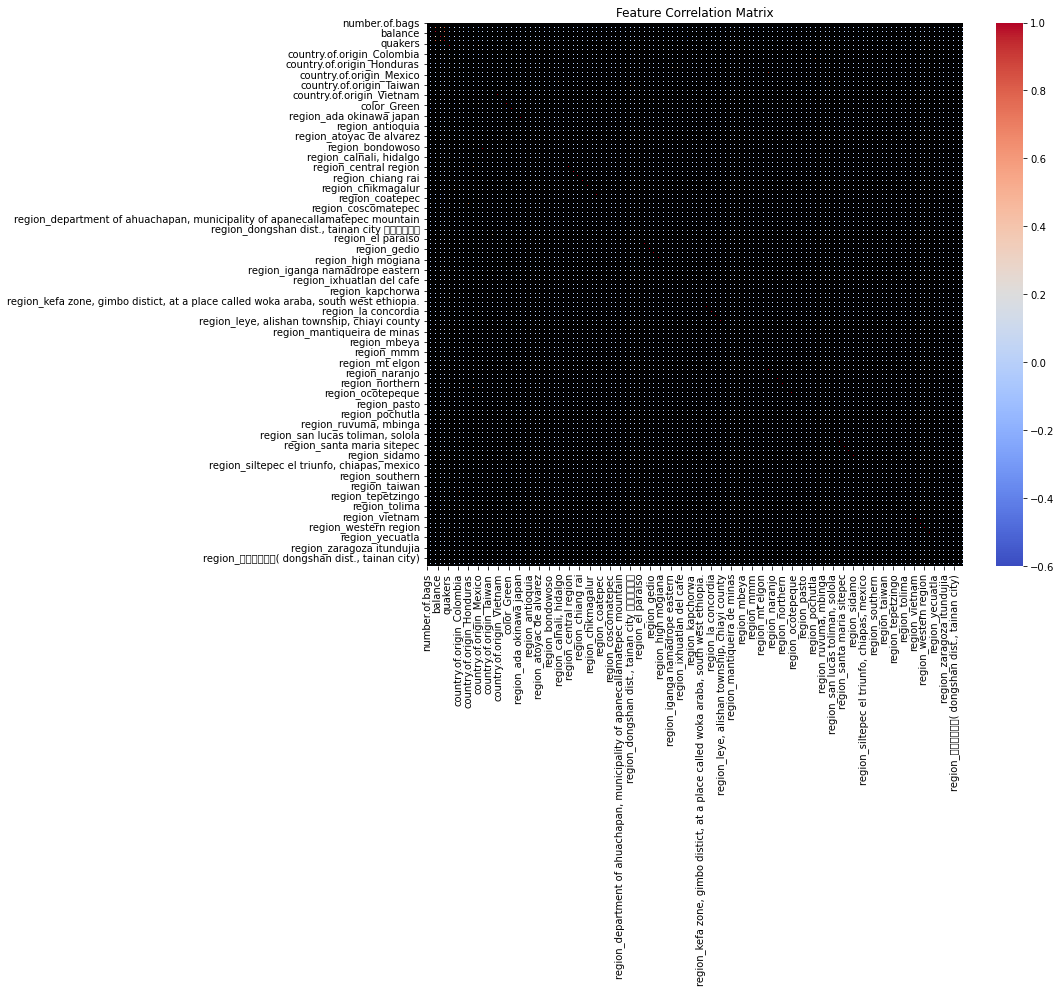

In [18]:
# please implement task 5 here
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the dataset
correlation_matrix = data_min_max_scaled.corr()

# Plot the correlation matrix as a heatmap for better visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Feature Correlation Matrix')
plt.show()

In [19]:
# Identify pairs of features with high correlation (above a threshold of 0.8)
high_correlation_pairs = {}
correlation_threshold = 0.8

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if idx == col:
            continue
        correlation = correlation_matrix.loc[idx, col]
        if abs(correlation) > correlation_threshold:
            high_correlation_pairs[f"{idx} and {col}"] = correlation

# Display the pairs of highly correlated features along with their correlation coefficients
high_correlation_pairs_df = pd.DataFrame(list(high_correlation_pairs.items()), columns=['Feature Pair', 'Correlation Coefficient'])
high_correlation_pairs_df

,Feature Pair,Correlation Coefficient
0,flavor and aroma,0.813259
1,aroma and flavor,0.813259
2,aftertaste and flavor,0.895672
3,acidity and flavor,0.816688
4,total.cup.points and flavor,0.874279
5,flavor and aftertaste,0.895672
6,balance and aftertaste,0.809639
7,total.cup.points and aftertaste,0.860656
8,flavor and acidity,0.816688
9,aftertaste and balance,0.809639


In [20]:
# Removing the recommended features based on the previous analysis
features_to_remove = [
    "flavor", "aroma", "aftertaste", "acidity", "balance", 
    "altitude_high_meters", "altitude_low_meters",
    # Adding correlated region features (we'll retain the country of origin features)
    "region_Huila", "region_Cauca", "region_Narino", "region_Antioquia"
]

# Remove the recommended features from the dataset
data_selected_features = data_min_max_scaled.drop(columns=features_to_remove, errors='ignore')

# Display the first few rows of the dataset after feature removal
data_selected_features.head()

,owner,farm.name,lot.number,mill,ico.number,company,altitude,producer,number.of.bags,bag.weight,in.country.partner,harvest.year,grading.date,owner.1,variety,body,uniformity,clean.cup,sweetness,cupper.points,total.cup.points,moisture,category.one.defects,quakers,category.two.defects,expiration,certification.body,certification.address,certification.contact,unit_of_measurement,altitude_mean_meters,species_Robusta,country.of.origin_Burundi,country.of.origin_China,country.of.origin_Colombia,country.of.origin_Costa Rica,country.of.origin_Cote d?Ivoire,country.of.origin_Ecuador,country.of.origin_El Salvador,country.of.origin_Ethiopia,country.of.origin_Guatemala,country.of.origin_Haiti,country.of.origin_Honduras,country.of.origin_India,country.of.origin_Indonesia,country.of.origin_Japan,country.of.origin_Kenya,country.of.origin_Laos,country.of.origin_Malawi,country.of.origin_Mauritius,...,region_tlacuilotepec,"region_tlanchinol, hidalgo",region_tlatlauquitepec,region_tolima,region_totutla,region_tres rios,region_turrialba,region_tuxtla gutierrez,region_vale da grama,region_valle central,region_veracruz,region_vietnam,region_vietnam cau dat,region_vietnam tutra,region_villa talea de castro,region_west and central valley,region_west nile,region_west valley,region_western,region_western region,region_xalapa,region_xicotepec de juarez,region_xishuangbanna prefecture,"region_xochitonalco, huautla",region_yajalon,region_yauco region,"region_yauk sauk, shan state",region_yecuatla,region_yirgacheffe,region_yunlin gukeng he bao 雲林縣古坑鄉荷苞村,region_yunlin 雲林縣石壁,region_yunnan,region_ywar ngan,region_ywar ngan township,region_zapotitlan de mendez,region_zaragoza itundujia,region_zentla,region_zihuatanejo de azueta,region_南投國姓,region_古坑鄉荷包村尖山坑60號,region_台中和平區,region_台中新社,"region_台南市東山區 (dongshan dist., tainan city)","region_台南市東山區( dongshan dist., tainan city)",region_台東太麻里,region_台灣,region_嘉義阿里山,region_國姓鄉 guoshing township,region_苗栗三灣,region_苗栗泰安
0,metad plc,metad plc,Unknown,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,METAD PLC,0.282486,60 kg,METAD Agricultural Development plc,4,356,metad plc,Unknown,0.990676,1.0,1.0,1.0,0.875,1.000000,0.428571,0.0,0.0,0.000000,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,0.010906,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,metad plc,metad plc,Unknown,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,METAD PLC,0.282486,60 kg,METAD Agricultural Development plc,4,356,metad plc,Other,0.981352,1.0,1.0,1.0,0.858,0.992714,0.428571,0.0,0.0,0.018182,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,0.010906,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,grounds for health admin,"san marcos barrancas ""san cristobal cuch",Unknown,Unknown,Unknown,Unknown,1600 - 1800 m,Unknown,0.004708,1,Specialty Coffee Association,9,7,Grounds for Health Admin,Bourbon,0.970862,1.0,1.0,1.0,0.925,0.990837,0.000000,0.0,0.0,0.000000,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,0.008934,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,yidnekachew dabessa,yidnekachew dabessa coffee plantation,Unknown,wolensu,Unknown,yidnekachew debessa coffee plantation,1800-2200,Yidnekachew Dabessa Coffee Plantation,0.301318,60 kg,METAD Agricultural Development plc,4,351,Yidnekachew Dabessa,Unknown,0.990676,1.0,1.0,1.0,0.867,0.982557,0.392857,0.0,0.0,0.036364,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f

In [ ]:
'''
SMOTE generates synthetic samples for the minority class by interpolating between existing samples. This helps in balancing 
the class distribution without replicating existing data points. SMOTE has successfully balanced the classes in the training set, resulting in an equal number of samples for both the 'Robusta' 
and 'Arabica' classes.

Random oversampling involves duplicating random samples from the minority class to balance the class distribution.
Both approaches have achieved the same goal of balancing the classes, but there are some key considerations:

SMOTE tends to generate synthetic samples that are more representative of the minority class, potentially improving the 
generalization of the model.

Random oversampling can introduce redundancy and overfitting since it replicates existing data points. It may not be as 
effective in improving the model's ability to generalize to unseen data.

Based on these considerations, SMOTE is generally the preferred approach for addressing class imbalance because it creates 
synthetic samples that maintain the diversity and characteristics of the minority class. Therefore, it is recommended 
to use the SMOTE-sampled training set for model training.
'''

<div class='alert alert-block alert-warning' style='font-size:150%'>

### Data Visualization


</div>

**Data Visualization** helps us to explore trends in the data, find correlations, or detect outliers. In the example below, we visualize the distribution of values for the feature:aroma. From the visualization, we see that most of the values from the feature:aroma fall between the values 6 and 9. This information can be used to inform our data mining tasks later on.


<img src="images/aroma.png" alt="Alternative text" />

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 6

### 6a: Implement two box plots on the features 'moisture' and 'sweetness' to identify any outliers. What do you see in the plot? (Write your answers below)
    
    
### 6b: Implement a scatter plot to visualize the moisture and sweetness of the species (Arabica and Robusta). What do you see?
    
</div>

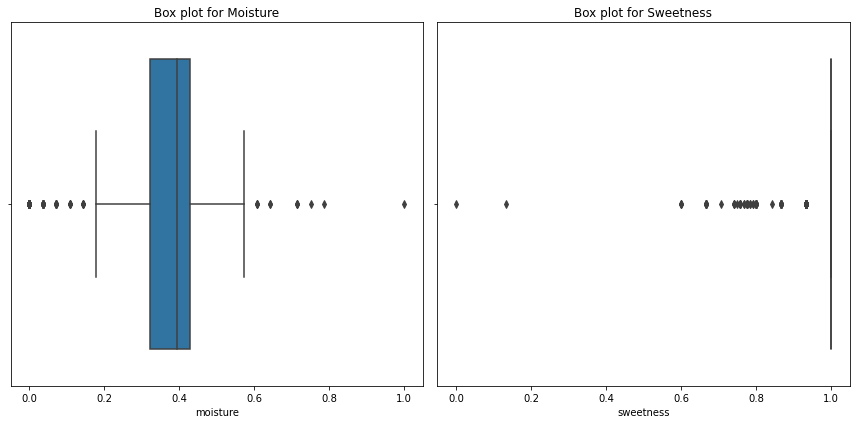

In [22]:
# Plotting box plot for 'moisture'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_selected_features['moisture'])
plt.title('Box plot for Moisture')

# Plotting box plot for 'sweetness'
plt.subplot(1, 2, 2)
sns.boxplot(x=data_selected_features['sweetness'])
plt.title('Box plot for Sweetness')

plt.tight_layout()
plt.show()

In [ ]:
'''
Moisture: Most of the data points are clustered around a small range of values. There are several points that are identified 
as outliers, lying above the upper whisker of the box plot.
      
Sweetness: It seems all the values are concentrated at a single point, indicating that there might be a single unique value
for this feature or there is a lack of variation in the data. It is advisable to further inspect this column to understand 
the distribution of values.
'''

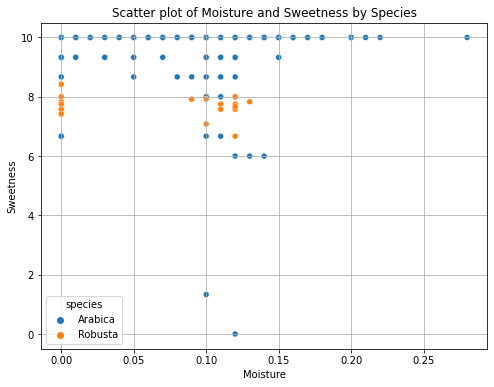

In [23]:
# Task 6b:

# Plotting scatter plot for 'moisture' and 'sweetness' for different species
plt.figure(figsize=(8, 6))
sns.scatterplot(x='moisture', y='sweetness', hue='species', data=data)
plt.title('Scatter plot of Moisture and Sweetness by Species')
plt.xlabel('Moisture')
plt.ylabel('Sweetness')
plt.grid(True)
plt.show()

In [ ]:
'''
Arabica Species: The points representing the Arabica species are dispersed across various levels of moisture but almost all of 
them have a sweetness score of 1.0, which indicates a lack of variation in the sweetness feature for this species.

Robusta Species: We observe a similar pattern for the Robusta species, where almost all the points have a sweetness score of 
1.0, with varying levels of moisture.
'''